# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Import data set

In [2]:
del_time=pd.read_csv('delivery_time.csv')
del_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3.Data Understanding

In [3]:
del_time.shape

(21, 2)

In [4]:
del_time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
del_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# 3.1 Assumption check

## 1.Normality

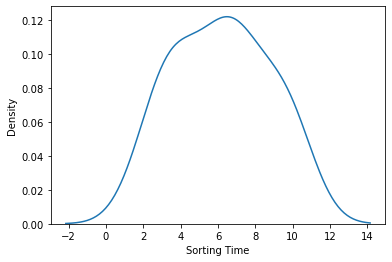

In [7]:
sns.distplot(del_time['Sorting Time'],hist=False)
plt.show()

## 2.Linearity

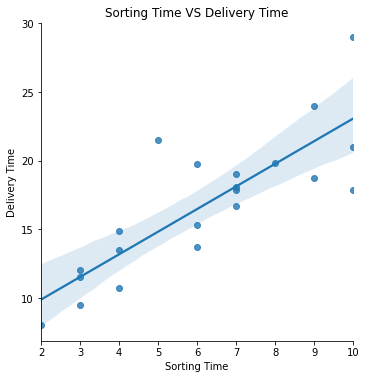

In [8]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=del_time)
plt.title('Sorting Time VS Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [9]:
df = del_time.rename(columns = {"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

In [10]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


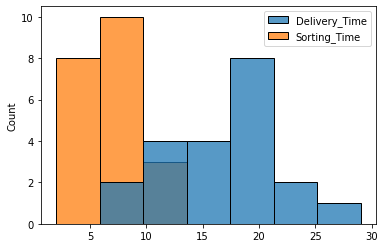

In [17]:
sns.histplot(df)
plt.show()

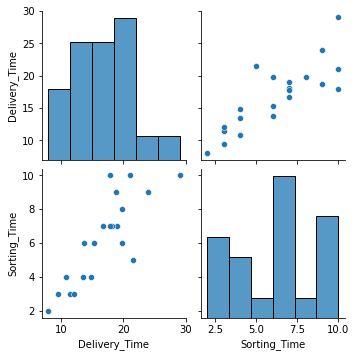

In [15]:
sns.pairplot(df)
plt.show()

In [11]:
corr=df.corr()

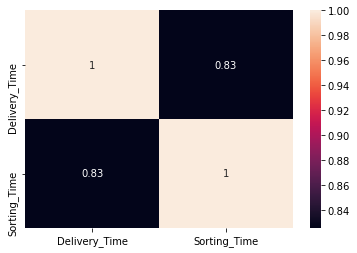

In [13]:
sns.heatmap(corr,annot=True)
plt.show()

# 5.Model Buliding

In [29]:
import statsmodels.formula.api as smf

In [30]:
linear_model=smf.ols(formula='Delivery_Time~Sorting_Time',data=df).fit()

In [31]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [33]:
linear_model.pvalues,linear_model.tvalues

(Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64,
 Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64)

In [44]:
#manual prediction
a=1.649020*20+6.582734
b=649020*78+6.582734
c=1.649020*67+6.582734
se=pd.Series([a,b,c])
se

0    3.956313e+01
1    5.062357e+07
2    1.170671e+02
dtype: float64

In [36]:
x=pd.DataFrame({'Sorting_Time':[20,78,67]})

In [38]:
us=linear_model.predict(x)

In [40]:
us

0     39.563132
1    135.206286
2    117.067067
dtype: float64